In [1]:
%load_ext autoreload
%autoreload 2

import analyze_utils

In [43]:
from os.path import join as oj

save_dir = '/root/interpretable-autoprompting/results/autoprompt_n_tokens'
nested_dirs = ['', 'autoprompt_2_tokens', 'autoprompt_3_tokens']

all_dfs, all_losses = [], []
for n in nested_dirs:
    df, losses = analyze_utils.load_results_and_cache_autoprompt_json(oj(save_dir, n), save_file='r.pkl', include_losses=True)
    df['legend'] = df.apply(analyze_utils.get_legend__autoprompt, axis=1)
    all_dfs.append(df)
    all_losses.append(losses)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.69it/s]

skipping /root/interpretable-autoprompting/results/autoprompt_n_tokens/autoprompt_3_tokens/Sep_27_09_25_dwtgmlqucavl/results.pkl (run still in progress?)


In [37]:
import seaborn as sns

In [56]:
all_dfs[0]['task_name'].unique()

array(['add_two', 'multiply_two', 'task1146_country_capital'],
      dtype=object)

In [103]:
blues = sns.color_palette("Blues", 8)
greens = sns.color_palette("Greens", 8)

In [104]:
blues[0]

(0.8825067281814687, 0.929196462898885, 0.9724413687043445)

In [118]:
cc_df, cc_losses = all_dfs[0], all_losses[0]
cc_df = cc_df.groupby(['task_name', 'model_cls', 'seed', 'num_learned_tokens']).first().reset_index()
len(cc_df), len(cc_losses)

(28, 34)

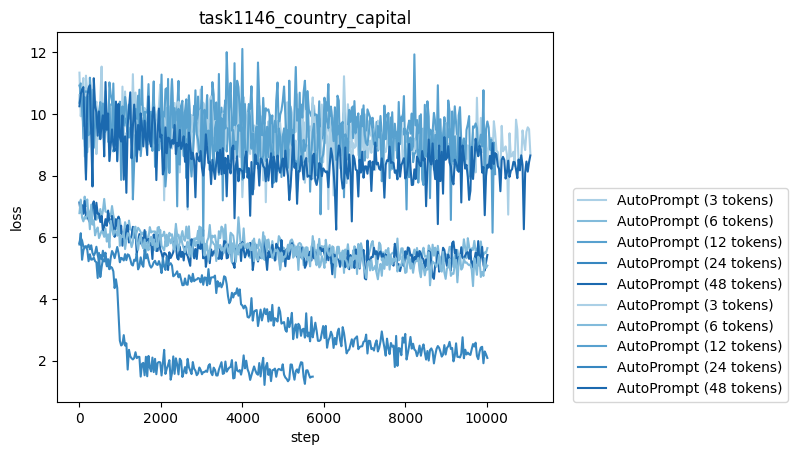

In [120]:
import matplotlib.pyplot as plt
import numpy as np

def get_color(row) -> str:
    colors = blues if row['legend'].startswith('AutoPrompt') else greens
    idx = cc_df['num_learned_tokens'].unique().tolist().index(row['num_learned_tokens'])
    return colors[2+idx]

for i in range(len(cc_df)):
    run_row = cc_df.iloc[i]
    run_losses = cc_losses[i]
    
    if run_row['task_name'] != 'task1146_country_capital': continue
    step = np.arange(len(run_losses)) * run_row['batch_size']
    sns.lineplot(x=step, y=run_losses, color=get_color(run_row), label=run_row['legend'])


plt.title('task1146_country_capital')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend(loc=(1.04, 0))